kaggle 主页：https://www.kaggle.com/c/sf-crime/

参考资料：

kaggle之旧金山犯罪
https://blog.csdn.net/lijingpengchina/article/details/52247633

https://www.jianshu.com/p/b3deccc7a5d0

In [50]:
import pandas as pd
import numpy as np  

In [51]:
%%time
# 用 pandas 载入 csv 训练数据，并解析第一列为日期格式
train = pd.read_csv('../input/train.csv', parse_dates=['Dates'])
test = pd.read_csv('../input/test.csv', parse_dates=['Dates'])

CPU times: user 3.63 s, sys: 370 ms, total: 4 s
Wall time: 4.06 s


In [52]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [53]:
# train.Category

## 给目标变量编码

In [54]:
from sklearn.preprocessing import LabelEncoder

#用 LabelEncoder 对不同的犯罪类型编号
leCrime = LabelEncoder()

In [55]:
crime = leCrime.fit_transform(train.Category)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


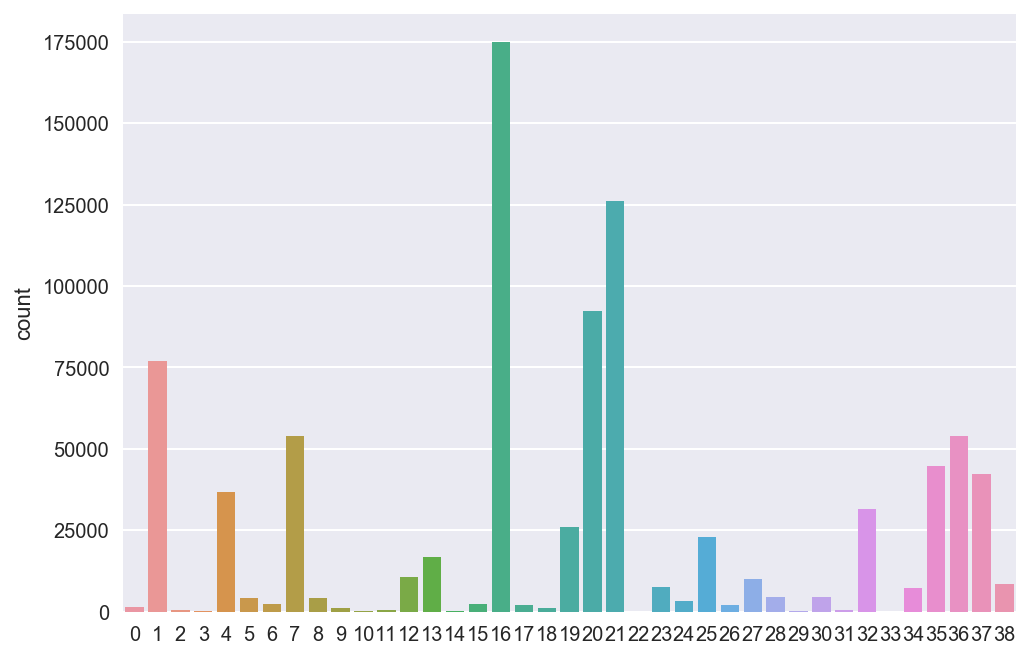

In [70]:
import seaborn as sns

sns.countplot(x=crime)
plt.show()

In [56]:
# 目标变量
crime

array([37, 21, 21, ..., 16, 35, 12])

In [57]:
# train.DayOfWeek

In [58]:
# train.PdDistrict

In [59]:
# 因子化星期几、街区、小时等特征
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour

hour = pd.get_dummies(hour)

In [60]:
# 组合特征

trainData = pd.concat([hour, days, district], axis=1)

In [61]:
trainData.shape

(878049, 41)

In [62]:
# 对于测试数据做同样的处理

days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)

hour = test.Dates.dt.hour
hour = pd.get_dummies(hour)

testData = pd.concat([hour, days, district], axis=1)

In [63]:
testData.shape

(884262, 41)

In [64]:
from sklearn import preprocessing
from sklearn.metrics import log_loss

# 只取星期几和街区作为分类器输入特征
features = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
    'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'
]

hourFea = [x for x in range(0, 24)]

features = features + hourFea

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    trainData, crime, test_size=0.4, random_state=42)

In [66]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=leCrime.classes_))

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       605
                    ASSAULT       0.17      0.03      0.06     30726
                 BAD CHECKS       0.00      0.00      0.00       156
                    BRIBERY       0.00      0.00      0.00       112
                   BURGLARY       0.11      0.00      0.00     14694
         DISORDERLY CONDUCT       0.00      0.00      0.00      1676
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       930
              DRUG/NARCOTIC       0.23      0.31      0.26     21700
                DRUNKENNESS       0.00      0.00      0.00      1724
               EMBEZZLEMENT       0.00      0.00      0.00       479
                  EXTORTION       0.00      0.00      0.00        90
            FAMILY OFFENSES       0.00      0.00      0.00       185
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      4193
                      FRAUD      

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
predict_proba = model.predict_proba(X_test)

In [78]:
predict_proba.shape

(351220, 39)

In [81]:
y_test

array([16,  1, 21, ..., 28, 35,  1])

In [79]:
log_loss(y_test, predict_proba)

2.5815393299643214

## 逻辑回归

In [90]:
%%time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=.1)
model.fit(X_train, y_train)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 53.3 s, sys: 297 ms, total: 53.6 s
Wall time: 53.7 s


In [93]:
predict_proba = model.predict_proba(X_test)
log_loss(y_test, predict_proba)

2.5799328823105556